In [31]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from scipy.optimize import newton
plt.style.use('seaborn-poster')

In [32]:
t, n, R, d = symbols('t n R delta')

q_1, q_2, psi_1, psi_2 = symbols('q_1, q_2, psi_1, psi_2')

H = sqrt(n * R * d * (n * q_1 ** 4 * psi_2 ** 2 + \
                      2 * q_1 ** 4 * psi_1 ** 2 + \
                      4 * q_1 ** 3 * q_2 * psi_1 * psi_2 + \
                      2 * q_1 ** 2 * q_2 ** 2 * psi_2 ** 2 - \
                      2 * R * n * q_1 ** 2 * psi_2 + \
                      + R ** 2 * n)) / (2 * q_1 ** 2)

right_parts = [H.diff(psi_1), H.diff(psi_2), - H.diff(q_1), - H.diff(q_2)]

n_ = 3
R_ = 8.31
delta_ = 0.1

e_start = n * R * 0.25 / 2
e_end = n * R * 0.165 / 2
v_start = 0.75
v_end = 0.55

init_q = [n * R / (2 * e_start), 
      - n * R / (2 * e_start) * np.log(v_start)]
end_q = [n * R / (2 * e_end), 
      - n * R / (2 * e_end) * np.log(v_end)]

start_time = 0
end_time = 2.175
time_dots = 10000
time_net = np.linspace(start_time, end_time, time_dots)
sol = []

In [33]:
# vars configuration is [q_1, q_2, psi_1, psi_2]
def hamiltonian_system(t, vars):
  return [float(right_parts[i].subs([(q_1, vars[0]), (q_2, vars[1]),
                                     (psi_1, vars[2]), (psi_2, vars[3]), 
                                     (n, n_), (R, R_), (d, delta_)])) for i in range(4)]


In [34]:
def objective(init_psi):
    sol = solve_ivp(hamiltonian_system, 
                    [start_time, end_time], 
                    [init_q[0], init_q[1], init_psi[0], init_psi[1]], 
                    t_eval=time_net)
    q_1 = sol.y[0]
    q_2 = sol.y[1]
    return [q_1[-1] - end_q[0], q_2[-1] - end_q[1]]

In [35]:
root = fsolve(objective, [0, 0])
sol = solve_ivp(hamiltonian_system, 
                [start_time, end_time], 
                [init_q[0], init_q[1], root[0], root[1]], 
                t_eval = time_net)

In [36]:
e = n_ * R_ / (2 * sol.y[0])
v = np.exp(- sol.y[1] / sol.y[0])
T = 2 * e / (n_ * R_) 

C:\Users\Vlad\AppData\Local\Temp/ipykernel_22204/3587452450.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(0.25, 0.75, 'ro', color="black")
C:\Users\Vlad\AppData\Local\Temp/ipykernel_22204/3587452450.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(0.165, 0.55, 'ro', color="black")


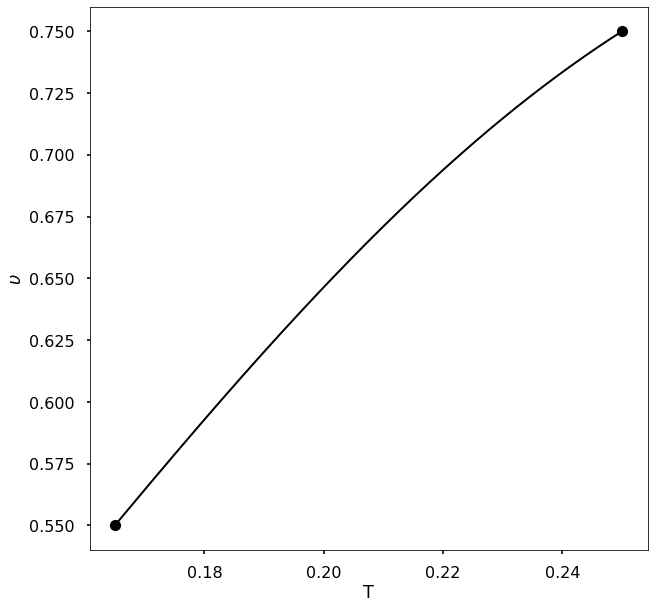

In [37]:
def show_result(T, v):    
    plt.figure(figsize = (10, 10))
    plt.plot(T, v, color="black", linewidth=2)
    plt.plot(0.25, 0.75, 'ro', color="black")
    plt.plot(0.165, 0.55, 'ro', color="black")
    plt.xlabel("T")
    plt.ylabel(r"$\upsilon$")
    plt.show()

show_result(T, v)